In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거
# ! pip install scikit-learn


     --------------------------------------- 11.2/11.2 MB 21.1 MB/s eta 0:00:00
     ------------------------------------- 301.8/301.8 KB 19.4 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\SSAFY\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
# plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['font.family'] ='AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

## ws_7_1

In [8]:
# 1. 교통 데이터 생성
data = pd.DataFrame({
    'Trip ID': [1, 2, 3, 4, 5],  # 각 트립(여행)의 고유 ID
    'Date': pd.date_range(start='2023-03-01', periods=5, freq='D')  # 2023년 3월 1일부터 5일간 날짜 생성
})
print(data.info())
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Trip ID  5 non-null      int64         
 1   Date     5 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 208.0 bytes
None


,Trip ID,Date
0,1,2023-03-01
1,2,2023-03-02
2,3,2023-03-03
3,4,2023-03-04
4,5,2023-03-05


In [4]:
# 2. 요일(day of the week) 컬럼 추가
data['Day of Week'] = data['Date'].dt.day_of_week  # 빈칸 채우기

# 3. 주말 여부(토요일=5, 일요일=6)를 기준으로 주말이면 1, 평일이면 0으로 설정
data['Is Weekend'] = data['Day of Week'].apply(lambda x: 1 if x >= 5 else 0)  # 빈칸 채우기

# 4. 결과 출력
data


,Trip ID,Date,Day of Week,Is Weekend
0,1,2023-03-01,2,0
1,2,2023-03-02,3,0
2,3,2023-03-03,4,0
3,4,2023-03-04,5,1
4,5,2023-03-05,6,1


## ws_7_2

In [4]:
# 1. 교통 데이터 생성
data = pd.DataFrame({
    'Trip ID': [_ for _ in range(1,11)],  # 각 트립(여행)의 고유 ID
    'Date': pd.date_range(start='2023-03-01', periods=10, freq='D')  # 2023년 3월 1일부터 5일간 날짜 생성
})
print(data.info())
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Trip ID  10 non-null     int64         
 1   Date     10 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 292.0 bytes
None


,Trip ID,Date
0,1,2023-03-01
1,2,2023-03-02
2,3,2023-03-03
3,4,2023-03-04
4,5,2023-03-05
5,6,2023-03-06
6,7,2023-03-07
7,8,2023-03-08
8,9,2023-03-09
9,10,2023-03-10


In [5]:
# 2. 요일(day of the week) 컬럼 추가
# pandas의 dt.day_of_week 속성을 사용하여 요일 정보를 숫자로 변환
# 0: 월요일, 1: 화요일, ..., 5: 토요일, 6: 일요일
data['Day of Week'] = data['Date'].dt.day_of_week  

# 3. One-Hot Encoding 적용 (get_dummies() 사용하지 않고 구현)
# 0부터 6까지 요일(월~일)에 대한 개별 컬럼을 생성하여 0으로 초기화
for i in range(7):  #  (요일은 0~6까지 존재)
    data[f'Day_{i}'] = (data['Day of Week'] == i).astype(int)  #  (해당 요일(True)이면 1, 아니면(False) 0)

# # 4. 'Day of Week' 컬럼 삭제 (One-Hot Encoding 후 필요 없으므로 제거)
# data = data.drop(columns=['Day of Week'])  

# 5. 결과 출력
data


,Trip ID,Date,Day of Week,Day_0,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6
0,1,2023-03-01,2,0,0,1,0,0,0,0
1,2,2023-03-02,3,0,0,0,1,0,0,0
2,3,2023-03-03,4,0,0,0,0,1,0,0
3,4,2023-03-04,5,0,0,0,0,0,1,0
4,5,2023-03-05,6,0,0,0,0,0,0,1
5,6,2023-03-06,0,1,0,0,0,0,0,0
6,7,2023-03-07,1,0,1,0,0,0,0,0
7,8,2023-03-08,2,0,0,1,0,0,0,0
8,9,2023-03-09,3,0,0,0,1,0,0,0
9,10,2023-03-10,4,0,0,0,0,1,0,0


## ws_7_3

In [35]:
# 1. 교통 데이터 생성
# 데이터에는 차량 유형(Vehicle Type), 출발지(Destination From), 도착지(Destination To) 정보가 포함됨
data = pd.DataFrame({
    'Trip ID': [1, 2, 3, 4, 5],  # 각 트립(여행)의 고유 ID
    'Vehicle Type': ['Sedan', 'SUV', 'Truck', 'Sedan', 'SUV'],  # 차량 유형 (Sedan, SUV, Truck)
    'Destination From': ['A', 'B', 'C', 'A', 'B'],  # 출발지 (A, B, C)
    'Destination To': ['Y', 'X', 'Z', 'X', 'Y']  # 도착지 (X, Y, Z)
})
print(data.info())
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Trip ID           5 non-null      int64 
 1   Vehicle Type      5 non-null      object
 2   Destination From  5 non-null      object
 3   Destination To    5 non-null      object
dtypes: int64(1), object(3)
memory usage: 288.0+ bytes
None


,Trip ID,Vehicle Type,Destination From,Destination To
0,1,Sedan,A,Y
1,2,SUV,B,X
2,3,Truck,C,Z
3,4,Sedan,A,X
4,5,SUV,B,Y


In [36]:
# 2. One-Hot Encoding (Vehicle Type 컬럼 변환)
# One-Hot Encoding은 범주형(문자형) 데이터를 0과 1로 변환하여 모델이 이해할 수 있도록 하는 기법
# pandas의 get_dummies() 함수를 사용하여 'Vehicle Type' 컬럼을 One-Hot Encoding 방식으로 변환
# get_dummies() 함수는 문자열 데이터를 여러 개의 컬럼으로 변환하여, 해당 값이면 1, 아니면 0으로 표시함
# 예: 'Sedan' -> [1, 0, 0], 'SUV' -> [0, 1, 0], 'Truck' -> [0, 0, 1]
data_encoded = pd.get_dummies(data, columns=['Vehicle Type'], prefix='Type')  # 빈칸 채우기
data_encoded

,Trip ID,Destination From,Destination To,Type_SUV,Type_Sedan,Type_Truck
0,1,A,Y,False,True,False
1,2,B,X,True,False,False
2,3,C,Z,False,False,True
3,4,A,X,False,True,False
4,5,B,Y,True,False,False


LabelEncoder는 주어진 데이터 안에 있는 고유값만 보고,

그것을 알파벳(문자열) 오름차순으로 정렬하고,

그 정렬된 순서대로 0부터 번호를 붙여요.

In [37]:
# 3. Label Encoding (출발지 및 도착지 컬럼 변환)
# Label Encoding은 범주형 데이터를 정수 값(0, 1, 2 등)으로 변환하는 기법
# 각 고유한 문자열 값을 고유한 숫자로 변환하여 저장함
# 예: 'A' -> 0, 'B' -> 1, 'C' -> 2

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 'Destination From' 컬럼을 라벨 인코딩하여 변환
data_encoded['Destination From'] = label_encoder.fit_transform(data_encoded['Destination From'])  # 빈칸 채우기

# 'Destination To' 컬럼을 라벨 인코딩하여 변환
data_encoded['Destination To'] = label_encoder.fit_transform(data_encoded['Destination To'])  # 빈칸 채우기

# 4. 결과 출력
data_encoded


,Trip ID,Destination From,Destination To,Type_SUV,Type_Sedan,Type_Truck
0,1,0,1,False,True,False
1,2,1,0,True,False,False
2,3,2,2,False,False,True
3,4,0,0,False,True,False
4,5,1,1,True,False,False


## ws_7_4

In [43]:
# 1. 실제값(y_true)과 예측값(y_pred) 생성
# 교통사고 예측 모델이 예측한 값과 실제 사고 여부 데이터를 비교하여 평가합니다.
# 0: 사고 없음, 1: 사고 발생을 나타내는 이진 분류 문제
y_true = [0, 1, 1, 0, 1, 0, 1, 1, 0, 0]  # 실제 값 (Ground Truth, 참값)
y_pred = [0, 1, 0, 0, 1, 0, 1, 1, 1, 0]  # 모델이 예측한 값 (Predicted Labels)

# 2. 혼동 행렬(confusion matrix) 생성
# confusion_matrix() 함수를 사용하여 실제값과 예측값을 비교하여 혼동 행렬을 생성합니다.
# 혼동 행렬은 모델이 얼마나 정확하게 예측했는지를 나타내는 중요한 지표입니다.
cm = confusion_matrix(y_true, y_pred)  # 빈칸 채우기

# 3. 모델의 정확도(Accuracy) 계산
# accuracy_score() 함수는 전체 샘플 중 모델이 올바르게 예측한 비율을 계산합니다.
accuracy = accuracy_score(y_true, y_pred)  # 빈칸 채우기

# 4. 개별 클래스(0: 사고 없음, 1: 사고 발생)에 대한 Precision, Recall, F1-score 계산
# 각 클래스(0 또는 1)에 대해 정밀도, 재현율, F1-score를 개별적으로 계산합니다.

# Precision (정밀도): 모델이 '사고 발생'이라고 예측한 값 중에서 실제로 사고가 발생한 비율
precision_class_0 = precision_score(y_true, y_pred, pos_label=0)  # 빈칸 채우기
precision_class_1 = precision_score(y_true, y_pred, pos_label=1)  # 빈칸 채우기

# Recall (재현율): 실제 사고 발생 중에서 모델이 '사고 발생'으로 올바르게 예측한 비율
recall_class_0 = recall_score(y_true, y_pred, pos_label=0)  # 빈칸 채우기
recall_class_1 = recall_score(y_true, y_pred, pos_label=1)  # 빈칸 채우기

# F1-score: Precision과 Recall의 조화 평균 (균형을 고려한 성능 평가 지표)
f1_class_0 = f1_score(y_true, y_pred, pos_label=0)  # 빈칸 채우기
f1_class_1 = f1_score(y_true, y_pred, pos_label=1)  # 빈칸 채우기

# 5. 결과 출력

# 혼동 행렬 출력
print("혼동 행렬 (Confusion Matrix):")
print(cm)  # 빈칸 채우기

# 모델 정확도 출력
print("\n모델 정확도 (Accuracy): {:.2f}".format(accuracy))  # 빈칸 채우기

# 개별 클래스별 Precision, Recall, F1-score 출력
print("\n개별 클래스별 Precision, Recall, F1-score:")
print("Class 0 (사고 없음) - Precision: {:.2f}, Recall: {:.2f}, F1-score: {:.2f}".format(precision_class_0, recall_class_0, f1_class_0))  # 빈칸 채우기
print("Class 1 (사고 발생) - Precision: {:.2f}, Recall: {:.2f}, F1-score: {:.2f}".format(precision_class_1, recall_class_1, f1_class_1))  # 빈칸 채우기

# 전체 모델 성능 평가 출력
print("\n전체 모델 성능 평가:")
print(classification_report(y_true,y_pred,target_names=['사고 없음', '사고 발생']))  # 빈칸 채우기


혼동 행렬 (Confusion Matrix):
[[4 1]
 [1 4]]

모델 정확도 (Accuracy): 0.80

개별 클래스별 Precision, Recall, F1-score:
Class 0 (사고 없음) - Precision: 0.80, Recall: 0.80, F1-score: 0.80
Class 1 (사고 발생) - Precision: 0.80, Recall: 0.80, F1-score: 0.80

전체 모델 성능 평가:
              precision    recall  f1-score   support

       사고 없음       0.80      0.80      0.80         5
       사고 발생       0.80      0.80      0.80         5

    accuracy                           0.80        10
   macro avg       0.80      0.80      0.80        10
weighted avg       0.80      0.80      0.80        10



## ws_7_5

In [54]:
# 1. 교통 데이터 생성
# 데이터에는 결측값(NaN)과 이상치(극단적인 값)가 포함되어 있음
data = pd.DataFrame({
    'Trip ID': [1, 2, 3, 4, 5, 6, 7, 8],
    'Distance (km)': [12.5, 25.3, 19.8, 30.2, np.nan, 100.5, 15.4, 200.0],  # 결측값 및 이상치 포함
    'Duration (hours)': [0.5, 1.2, 0.8, np.nan, 0.6, 5.5, 0.9, 10.0]  # 결측값 및 이상치 포함
})
original_data = data.copy()

# 전처리 전 데이터 크기 출력
print("전처리 전 데이터 크기:", data.shape)
print()
print(data.info())
print()
data

전처리 전 데이터 크기: (8, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Trip ID           8 non-null      int64  
 1   Distance (km)     7 non-null      float64
 2   Duration (hours)  7 non-null      float64
dtypes: float64(2), int64(1)
memory usage: 320.0 bytes
None



,Trip ID,Distance (km),Duration (hours)
0,1,12.5,0.5
1,2,25.3,1.2
2,3,19.8,0.8
3,4,30.2,NaN
4,5,NaN,0.6
5,6,100.5,5.5
6,7,15.4,0.9
7,8,200.0,10.0


In [55]:
# 2. 결측값 처리 (중앙값 대체)
# 결측값을 대체하기 전에 이상치를 제거한 후 중앙값을 계산해야 함
# IQR 방법을 사용하여 이상치를 제외한 데이터를 기반으로 중앙값을 계산
for column in ['Distance (km)', 'Duration (hours)']:
    # 2-1. 사분위수 계산
    Q1 = data[column].quantile(.25)  # 빈칸 채우기 (Q1 계산)
    Q3 = data[column].quantile(.75)  # 빈칸 채우기 (Q3 계산)
    IQR = Q3-Q1  # 빈칸 채우기 (IQR 계산)

    # 2-2. 이상치 경계 계산
    lower_bound = Q1 - 1.5*IQR  # 빈칸 채우기 (IQR 하한값)
    upper_bound = Q3 + 1.5*IQR  # 빈칸 채우기 (IQR 상한값)
    print(f'{column} [lower_bound: {lower_bound} / upper_bound: {upper_bound}]')

    # 2-3. 이상치를 제외한 데이터에서 중앙값 계산
    filtered_median = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)][column].median()  # 빈칸 채우기

    # 2-4. 결측값을 중앙값으로 대체
    data[column].fillna(filtered_median, inplace=True)  # 빈칸 채우기 (결측값 대체)

filled_data = data.copy()  # 결측값 처리된 상태 저장

print(data.info())
data

Distance (km) [lower_bound: -54.024999999999984 / upper_bound: 136.97499999999997]
Duration (hours) [lower_bound: -3.2750000000000004 / upper_bound: 7.325000000000001]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Trip ID           8 non-null      int64  
 1   Distance (km)     8 non-null      float64
 2   Duration (hours)  8 non-null      float64
dtypes: float64(2), int64(1)
memory usage: 320.0 bytes
None


,Trip ID,Distance (km),Duration (hours)
0,1,12.50,0.50
1,2,25.30,1.20
2,3,19.80,0.80
3,4,30.20,0.85
4,5,22.55,0.60
5,6,100.50,5.50
6,7,15.40,0.90
7,8,200.00,10.00


In [56]:
# 3. 이상치 처리 (IQR 방법 사용)
# 각 컬럼에서 이상치를 탐지하고 제거, 단 한 컬럼에서 이상치여도 전체 행이 삭제되는 것은 아님
for column in ['Distance (km)', 'Duration (hours)']:
    # 3-1. IQR을 다시 계산
    Q1 = data[column].quantile(.25)  # 빈칸 채우기 (Q1 계산)
    Q3 = data[column].quantile(.75)  # 빈칸 채우기 (Q3 계산)
    IQR = Q3-Q1  # 빈칸 채우기 (IQR 계산)
    
    lower_bound = Q1 - 1.5*IQR  # 빈칸 채우기 (IQR 하한값)
    upper_bound = Q3 + 1.5*IQR  # 빈칸 채우기 (IQR 상한값)
    print(f'{column} [lower_bound: {lower_bound} / upper_bound: {upper_bound}]')

    # 3-2. 이상치가 아닌 값만 남기기
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

cleaned_data = data.copy()

# 전처리 후 데이터 크기 출력
print("전처리 후 데이터 크기:", data.shape)

# 전처리된 데이터 출력
data

Distance (km) [lower_bound: -24.912499999999998 / upper_bound: 91.38749999999999]
Duration (hours) [lower_bound: 0.29374999999999996 / upper_bound: 1.2437500000000001]
전처리 후 데이터 크기: (6, 3)


,Trip ID,Distance (km),Duration (hours)
0,1,12.50,0.50
1,2,25.30,1.20
2,3,19.80,0.80
3,4,30.20,0.85
4,5,22.55,0.60
6,7,15.40,0.90


결측값을 중앙값으로 대체하며, lower_bound와 upper_bound의 값이 변화하였다.
그렇기 때문에 이상치 처리를 할 때 이상치의 범위가 달라졌고,
기존에는 7번 열만 삭제될 예정이었지만, 5번 열까지 범위에서 벗어나며
5번 열까지 삭제되는 변화가 일어났다.

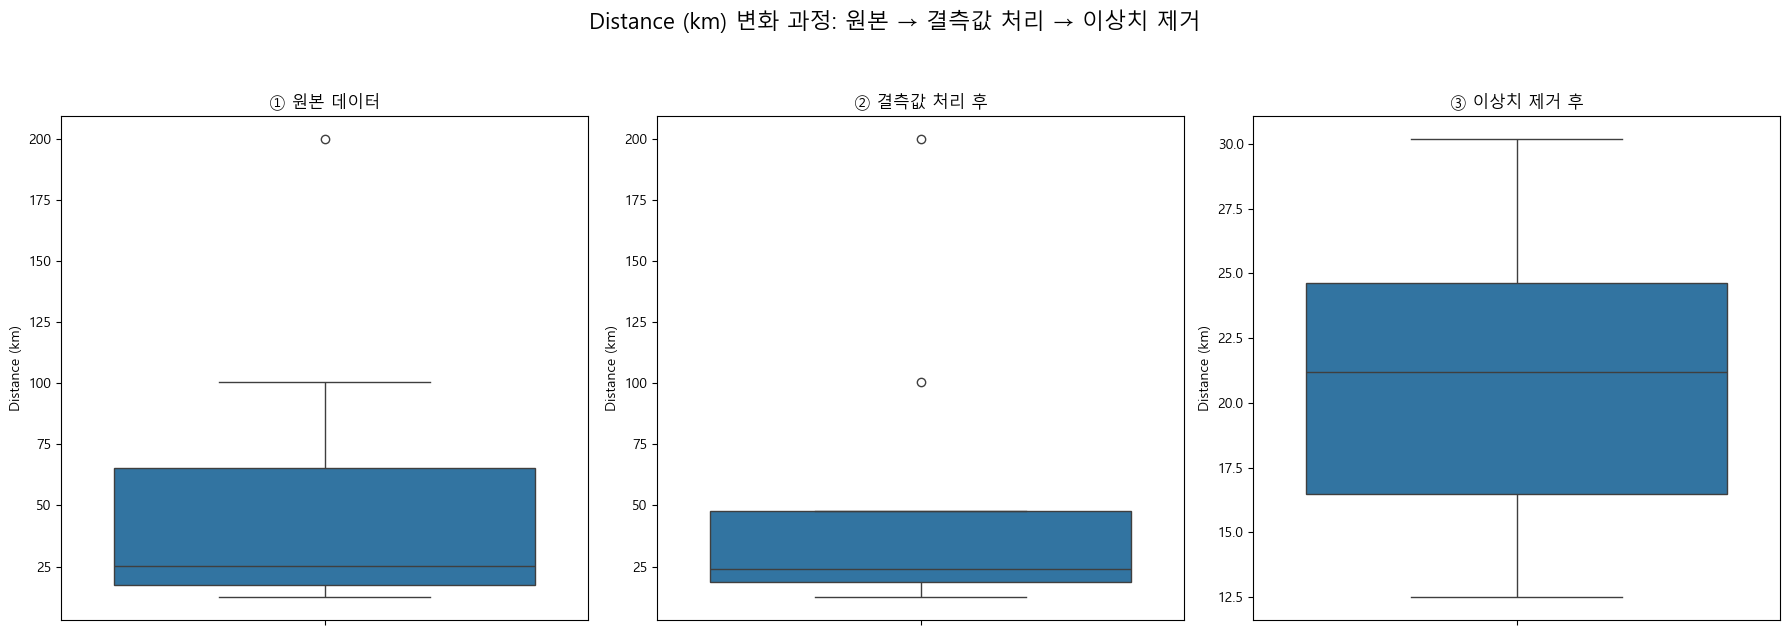

In [61]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 공통 제목 추가
fig.suptitle("Distance (km) 변화 과정: 원본 → 결측값 처리 → 이상치 제거", fontsize=16, y=1.05)

# 각 박스플롯 그리기
sns.boxplot(data=original_data, y='Distance (km)', ax=axes[0])
axes[0].set_title("① 원본 데이터")
axes[0].set_ylabel("Distance (km)")

sns.boxplot(data=filled_data, y='Distance (km)', ax=axes[1])
axes[1].set_title("② 결측값 처리 후")
axes[1].set_ylabel("Distance (km)")

sns.boxplot(data=cleaned_data, y='Distance (km)', ax=axes[2])
axes[2].set_title("③ 이상치 제거 후")
axes[2].set_ylabel("Distance (km)")

plt.tight_layout()
plt.show()


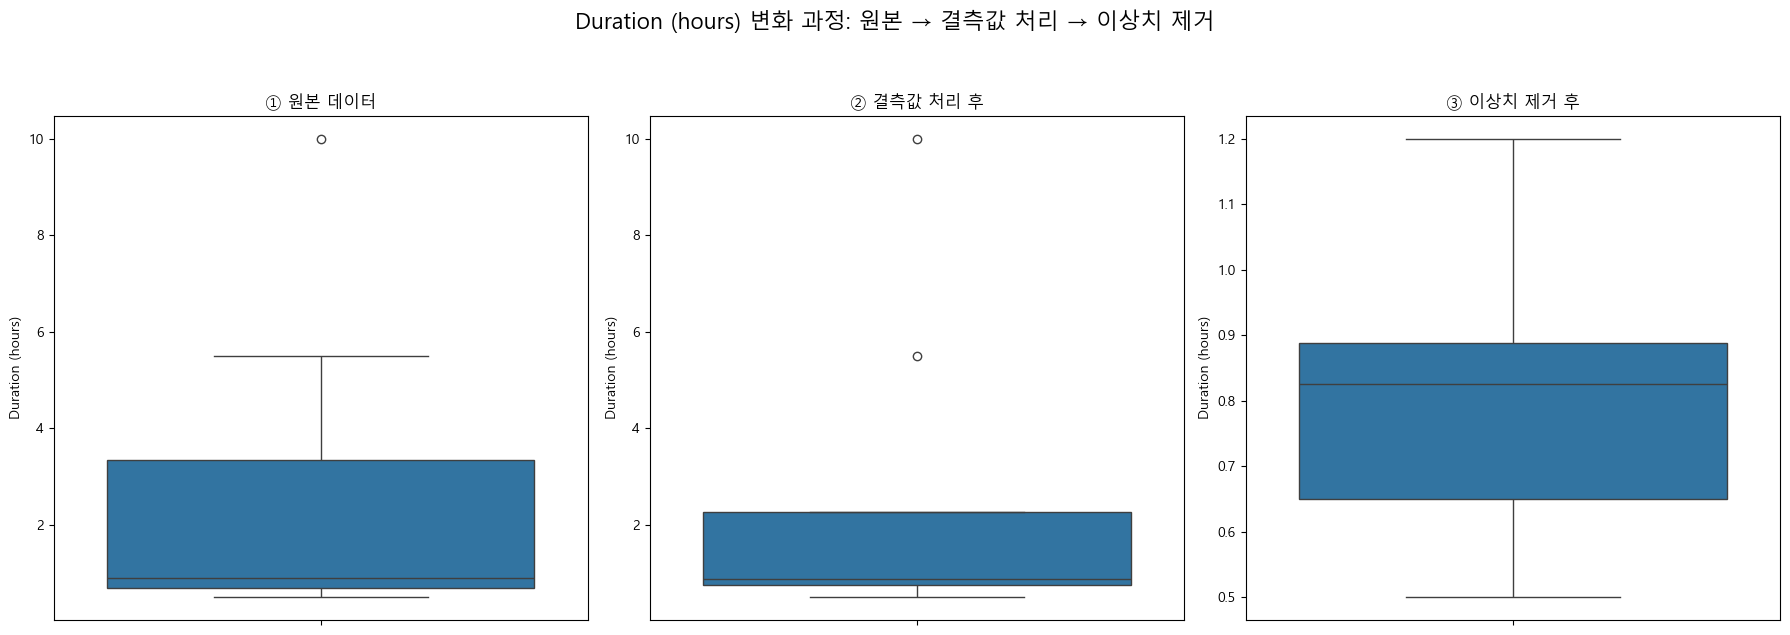

In [63]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

fig.suptitle("Duration (hours) 변화 과정: 원본 → 결측값 처리 → 이상치 제거", fontsize=16, y=1.05)

sns.boxplot(data=original_data, y='Duration (hours)', ax=axes[0])
axes[0].set_title("① 원본 데이터")
axes[0].set_ylabel("Duration (hours)")

sns.boxplot(data=filled_data, y='Duration (hours)', ax=axes[1])
axes[1].set_title("② 결측값 처리 후")
axes[1].set_ylabel("Duration (hours)")

sns.boxplot(data=cleaned_data, y='Duration (hours)', ax=axes[2])
axes[2].set_title("③ 이상치 제거 후")
axes[2].set_ylabel("Duration (hours)")

plt.tight_layout()
plt.show()
